## Stock Analysis with Ichimoku Plot
Based on Derek Banas video https://www.youtube.com/watch?v=yxktsDacs1c

In [16]:
%%capture
piplist = !pip list
if "google.colab" in str(get_ipython()) and not any(["yfinance" in p for p in piplist]):
    !pip install yfinance

In [10]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

import datetime as dt

import cufflinks as cf
import plotly.express as px
import plotly.graph_objs as go

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

from plotly.subplots import make_subplots

In [3]:
# Function to create colors
def get_fill_color(label):
    if label >= 1:
        return "rgba(0, 250, 0, 0.4)"
    else:
        return "rgba(250, 0, 0, 0.4)"

In [4]:
# Download stock data and add data for Ichimoku plot
def get_ichimoku(ticker, period="1y", interval="1d"):
    """Get stock data and make an Ichimoku plot.
    
    Keyword arguments:
    ticker -- ticker symbol to plot
    period -- time period to get data from (1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max)
    inteval -- data by interval (1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo)
    
    """
    
    # Download stock data
    df = yf.download(tickers=ticker, period=period, interval=interval)
    
    # Calculate Conversion Line
    hi_val = df["High"].rolling(window=9).max()
    low_val = df["Low"].rolling(window=9).min()
    df["Conversion"] = (hi_val + low_val) / 2
    
    # Calculate Base Line
    hi_val = df["High"].rolling(window=26).max()
    low_val = df["Low"].rolling(window=26).min()
    df["Baseline"] = (hi_val + low_val) / 2
    
    # Calculate Spans
    df["SpanA"] = ((df["Conversion"] + df["Baseline"]) / 2).shift(26)
    hi_val = df["High"].rolling(window=52).max()
    low_val = df["Low"].rolling(window=52).min()
    df["SpanB"] = ((hi_val + low_val) / 2).shift(26)
    
    # Calculate Lagging Line
    df["Lagging"] = df["Close"].shift(-26)

    # Set labels and group
    df["label"] = np.where(df["SpanA"] > df["SpanB"], 1, 0)
    df["group"] = df["label"].ne(df["label"].shift()).cumsum()    
    
    # Plot
    candle = go.Candlestick(
        x= df.index,
        open=df["Open"],
        high=df["High"],
        low=df["Low"],
        close=df["Close"],
        name="Candlestick"
    )
    
    fig = go.Figure()
    
    grouped_df = df.groupby("group")
    
    dfs = []
    for name, data in grouped_df:
        dfs.append(data)

        
    for d in dfs:
        fig.add_traces(go.Scatter(
            x=d.index,
            y=d["SpanA"],
            line={"color": "rgba(0,0,0,0)"}
        ))
        fig.add_traces(go.Scatter(
            x=d.index,
            y=d["SpanB"],
            line={"color": "rgba(0,0,0,0)"},
            fill="tonexty",
            fillcolor=get_fill_color(d["label"].iloc[0])
        ))
        
    baseline = go.Scatter(
        x=df.index,
        y=df["Baseline"],
        line={"color": "pink", "width": 2},
        name="Baseline"
    )
    
    conversion = go.Scatter(
        x=df.index,
        y=df["Conversion"],
        line={"color": "black", "width": 1},
        name="Conversion"
    )
        
    lagging = go.Scatter(
        x=df.index,
        y=df["Lagging"],
        line={"color": "purple", "width": 2},
        name="Lagging"
    )
    
    span_a = go.Scatter(
        x=df.index,
        y=df["SpanA"],
        line={"color": "green", "width": 2},
        name="Span A"
    )
    
    span_b = go.Scatter(
        x=df.index,
        y=df["SpanB"],
        line={"color": "red", "width": 1},
        name="Span B"
    )
    
    
    fig.add_trace(candle)
    fig.add_trace(baseline)
    fig.add_trace(conversion)
    fig.add_trace(lagging)
    fig.add_trace(span_a)
    fig.add_trace(span_b)
    
    fig.update_layout(height=600, width=1000, showlegend=True)
    
    # fig.show()
    iplot(fig)

In [5]:
data = [
    go.Contour(
        z=[[10, 10.625, 12.5, 15.625, 20],
           [5.625, 6.25, 8.125, 11.25, 15.625],
           [2.5, 3.125, 5., 8.125, 12.5],
           [0.625, 1.25, 3.125, 6.25, 10.625],
           [0, 0.625, 2.5, 5.625, 10]]
    )
]
iplot(data)

In [6]:
# Kinnevik B
get_ichimoku("KINV-B.ST", "5y", "1d")

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


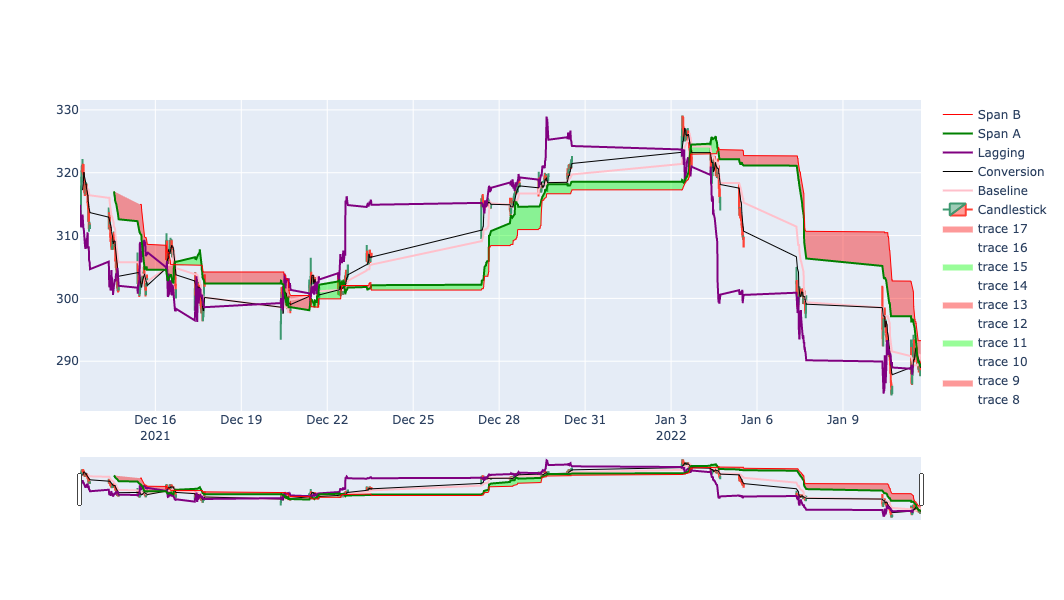

In [ ]:
# Kinnevik B
get_ichimoku("KINV-B.ST", "1mo", "15m")

[*********************100%***********************]  1 of 1 completed


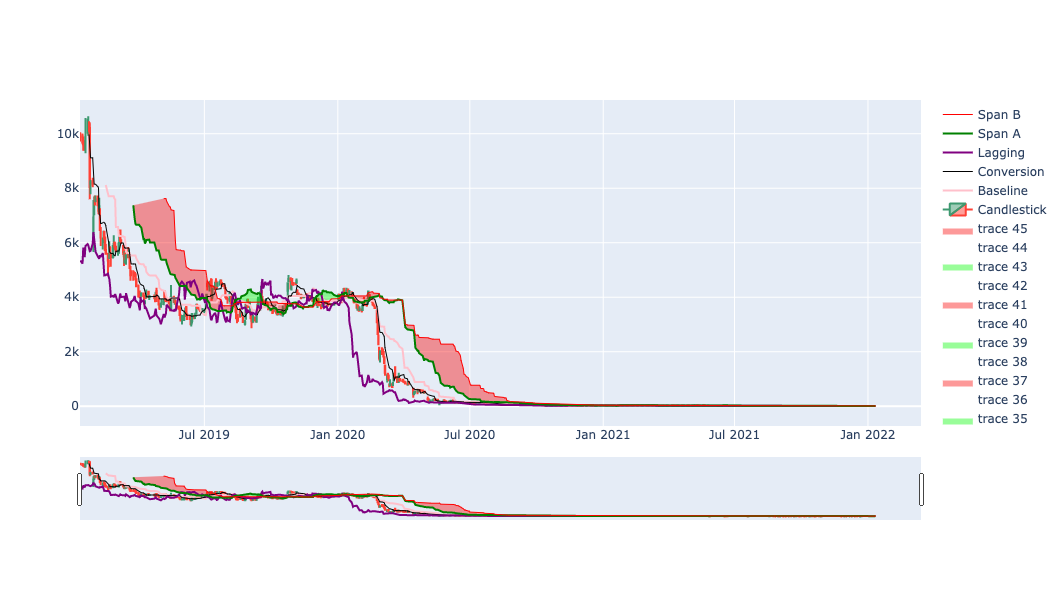

In [ ]:
# Norwegian Air Shuttle AS
get_ichimoku("NAS.OL", "3y", "1d")

[*********************100%***********************]  1 of 1 completed


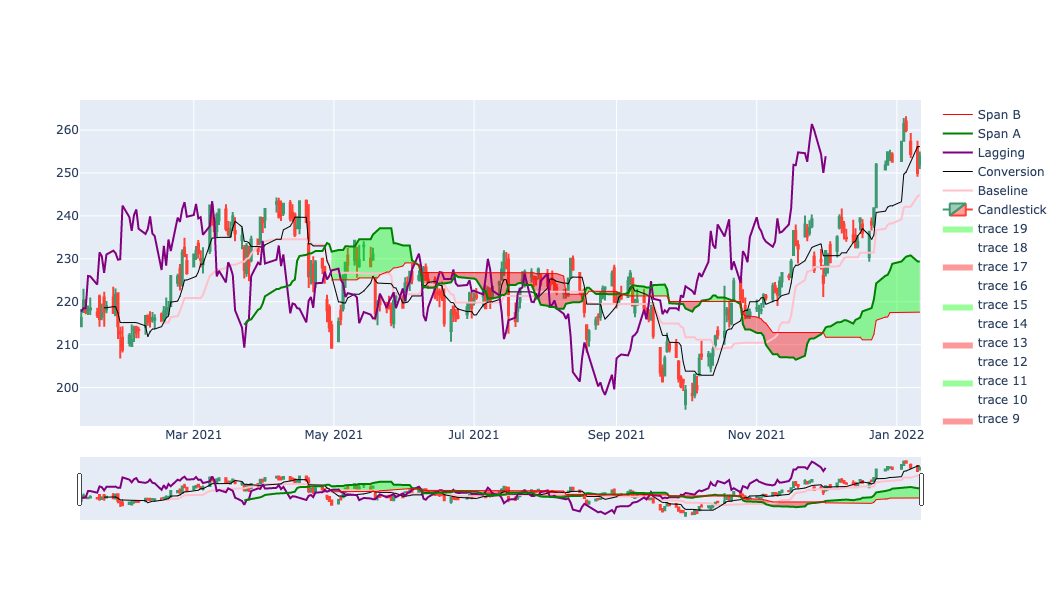

In [ ]:
# Sandvik
get_ichimoku("SAND.ST", "1y", "1d")